In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted;

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Random Variables and Discrete Distributions

Today we will recall the concept of a random variable and discuss different types of random variables. 

In addition, we will talk about discrete distributions. We will define the expected value and variance of a discrete random variable and provide an overview of commonly used discrete distributions.

## Random Variables

When an experiment is performed, we might be interested in its actual outcome itself. However, more frequently we are interested in some function of the outcome. 

For instance, in tossing dice, we are often considering the sum of the two dice and are not really concerned about the separate values of each die. That is, we may be interested in knowing that the sum is 7 and may not be concerned over whether the actual outcome was $(1, 6), (2, 5), (3, 4), (4, 3), (5, 2),$ or $(6, 1)$. Also, in flipping a coin, we may be interested in the total number of heads that occur and not care at all about the actual head–tail sequence that results. These quantities of interest are known as _random variables_.

Because the value of a random variable is determined by the outcome of the experiment, we assign probabilities to the possible values of the random variable.

Notationally, we use CAPITAL LETTERS for random variables and lowercase for non-random quantities.

We will distinguish between _categorical_ random variables and _numerical_ random variables.

### Categorical Random Variables

In the case of the policeman, that we discussed in the previous lecture, he may formulate a categorical random variable $G$ to describe the gentleman. To specify the distribution of $G$, the policeman might decide:

$$ P(G = \text{thief}) = 0.3, $$

which would mean therefore that 

$$ P(G = \text{honest}) = 0.7. $$

As another example, consider a traffic light that may be red, green, or yellow.  We could describe it as a categorical random variable, corresponding to what we see when we observe it at a random time.

If we denote this random variable as $X$, we might find the following:

| color | P(X = color) |
| ----| -----------|
| red | 0.4 |
| green | 0.4 |
| yellow | 0.2 |


Thus, to specify the distribution for a categorical random variable,  conceptually we __construct a table__ showing the probabilities of all of the possible values of the random variable.

### Numerical Random Variables

In contrast, a numerical random variable takes on numbers as values. In general, a random variable is a function from $\Omega$ to the real numbers. 

We distinguish between discrete and continuous random variables. 

A _discrete random variable_ is a random variable that can take on
only a finite or at most a countably infinite number of values. <br>
__Example__: the number of points showing after a roll of a die. 

A _continuous random variable_ is a random variable that can take
on any value from a given range. That is, a continuous random variable has an uncountable set of possible outcomes.<br>
__Example__: the lifetime of a light bulb.

## Discrete Distributions

### Probability Mass Function

__Definition.__ For a discrete random variable $X$, we define the _probability mass function (PMF)_ $p(a)$ of $X$ by

$$p(a) = P(X=a).$$

The PMF $p(a)$ is positive for at most a countable number of values of $a$. That is, if $X$ must assume one of the values $x_1, x_2,...,$ then

\begin{align*}
&p(x_i)  \geq 0 \:  \text{ for } i=1,2,... \\
&p(x)  = 0 \: \text{ for all other values of } x.
\end{align*}

Since $X$ must take on one of the values $x_i$, we have

$$\sum_{i=1}^{\infty} p(x_i) = 1. $$

It is often instructive to present the probability mass function in a graphical format by plotting $p(x_i)$ on the y-axis against $x_i$ on the x-axis. 

__Example.__  Consider the roll of a single die.  The random variable here is the number of points showing.  What is the PDF of this discrete random variable?

<center>
    
<img src="images/single-die.png" alt="Die" width="100px">
    
</center>

We do not have any reason for thinking that one outcome is more likely than another, so we assign equal probabilities to each outcome $\Omega = \{1, 2, 3, 4, 5, 6\}$:

$$p(x_i) = \frac{1}{6}.$$

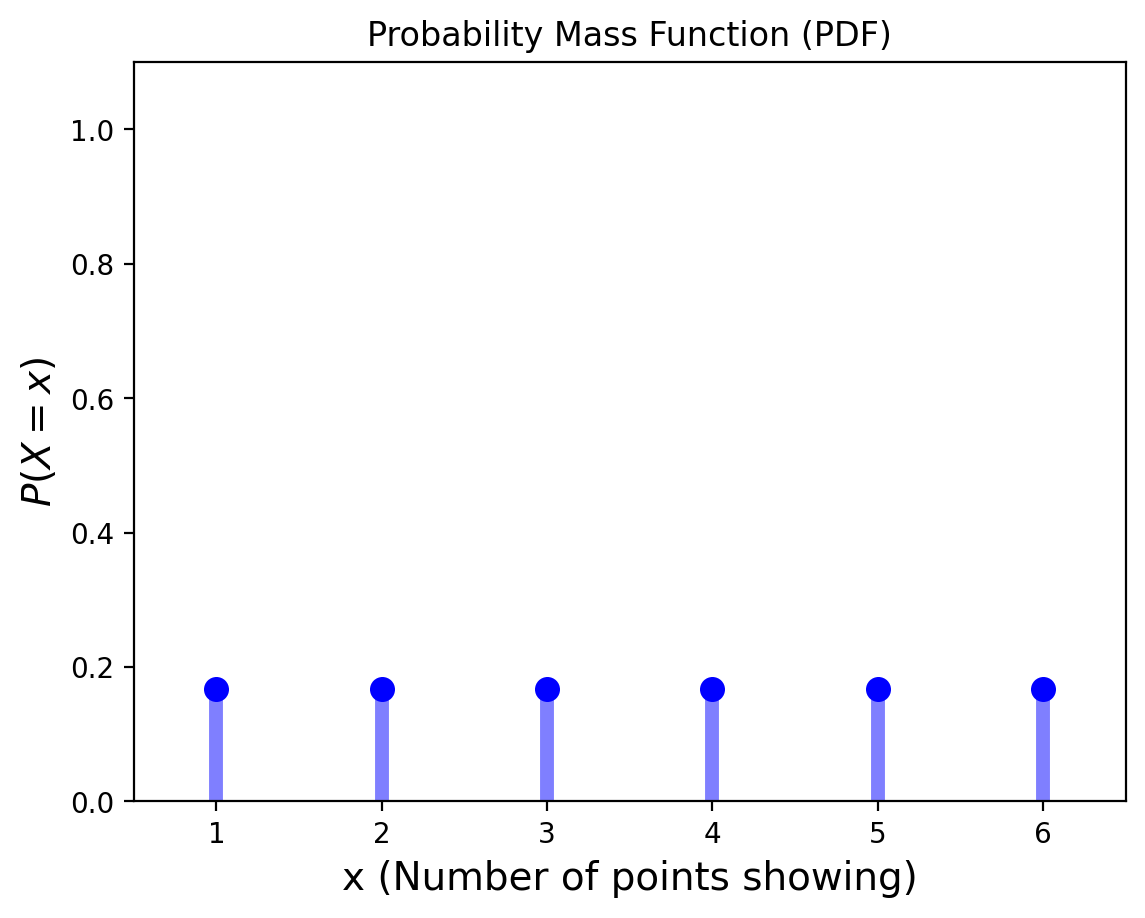

In [2]:
plt.figure()
x = np.arange(1, 7)
plt.plot(x, 6*[1/6.], 'bo', ms=8)
plt.vlines(x, 0, 1/6., colors='b', lw=5, alpha=0.5)
plt.xlim([0.5, 6.5])
plt.ylim([0, 1.1])
plt.title('Probability Mass Function (PDF)')
plt.xlabel(r'x (Number of points showing)', size=14)
plt.ylabel(r'$P(X = x)$', size=14);

__Definition.__ The _cumulative distribution function (CDF)_ $F$ can be expressed in terms of $p(a)$ by

$$F(a) = P(X \leq a) = \sum_{x\leq a} p(x).$$

If $X$ is a discrete random variable whose possible values are $x_1 , x_2 , x_3 ,...$, where $x_1 < x_2 < x_3 <...$, then the distribution function $F$ of $X$ is a step function. That is, the value of $F$ is constant in the intervals $[x_i−1,x_i)$ and then takes a step (or jump) of size $p(x_i)$ at $x_i$. 

__Example.__  Let us return to the roll of a single die. The corresponding CDF is shown below.

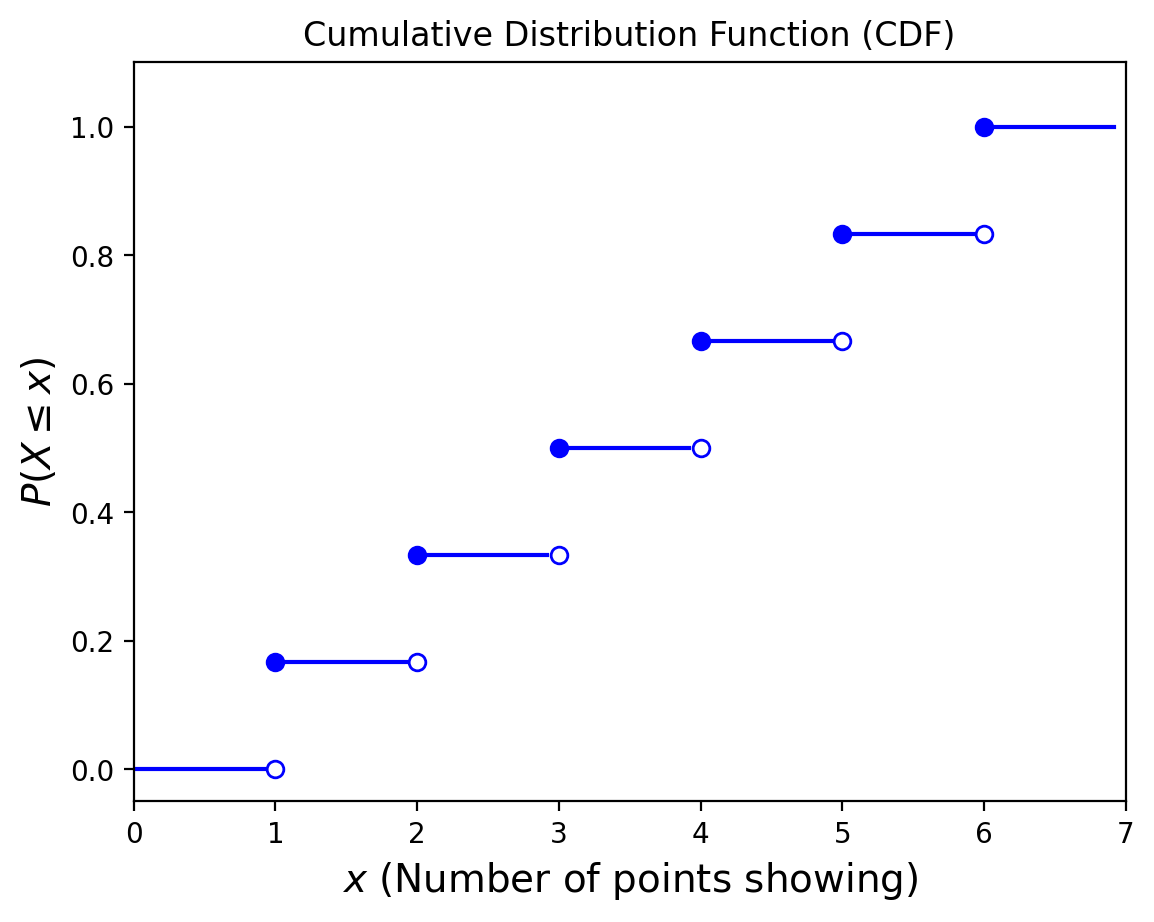

In [3]:
plt.figure()
for i in range(7):
    plt.plot([i, i+1-.08], [i/6, i/6],'-b')
for i in range(1, 7):
    plt.plot(i, i/6, 'ob')
    plt.plot(i, (i-1)/6, 'ob', fillstyle = 'none')
plt.xlim([0, 7])
plt.ylim([-0.05, 1.1])
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel(r'$x$ (Number of points showing)', size=14)
plt.ylabel(r'$P(X\leq x)$', size=14);

### Expected Value

One of the most important concepts in probability theory is that of the expectation of a random variable. 

__Definition.__ If $X$ is a discrete random variable having a probability mass function $p(x)$, then the _expectation_, or the _expected value_, of $X$, denoted by $E[X]$, is defined by 

$$ E[X] = \sum_{x=-\infty}^{+\infty} x\cdot  P(X=x) = \sum_{x=-\infty}^{+\infty} x\cdot  p(x). $$

In words, the expected value of $X$ is a weighted average of the possible values that $X$ can take on, each value being weighted by the probability that $X$ assumes it.

The expected value tells us what to expect from the average of many observations of the random variable.

It does __not__ tell us what to expect from a single observation.

__Example.__ What is the expected value of a die roll? Let $X$ represent the number of points after a single die roll. Then

\begin{align*}
E[X] & = \sum_{x=1}^{6} P(X=x) \cdot x \\
&= P(X=1) \cdot 1 + P(X=2) \cdot 2 + P(X=3) \cdot 3 \\
&+ P(X=4) \cdot 4 + P(X=5) \cdot 5 + P(X=6) \cdot 6 \\
&= 1/6 \cdot (1 + 2 + 3 + 4 + 5 + 6) = 3.5.
\end{align*}

But 3.5 is a value that can __never occur__ for a roll of the die!

### Variance

Given a random variable $X$ along with its distribution function $F$, it would be extremely useful if we were able to summarize the essential properties of $F$ by certain suitably defined measures. 

One such measure is, of course $E[X]$, the expected value of $X$. However, it does not tell us anything about the variation, or spread, of the possible values of $X$. 

To caracterize the variability of random quantities we use _variance,_ the mean squared difference of the random variable from its mean.

__Definition.__ The variance of a random variable $X$ is

$$ \mbox{Var} (X) = E[(X - \overline{X})^2]. $$

Where we use the notation $\overline{X}$ to represent $E[X]$.

For example, given a discrete random variable $X$ with $E[X] = \mu$ this would be:

$$ \mbox{Var} (X) = \sum_{x=-\infty}^{+\infty} (x-\mu)^2\; P(X=x) = \sum_{x=-\infty}^{+\infty} (x-\mu)^2\; p(x). $$

We frequently use the symbol $\sigma^2$ to denote variance.

What is the variance of a die roll?

We already know the expected value (or mean) is 3.5. Hence, the variance is equal to

\begin{align*}
\mbox{Var} (X) &= \sum_{x=1}^{6} (x-3.5)^2\; P(X=x).\\
&= 1/6\sum_{x=1}^{6} (x-3.5)^2\; = 35/12.
\end{align*}

Of course, random variables with the same mean can have vastly different variances.

How could we change our die to achieve this?

In [4]:
import numpy as np

# Outcomes
outcomes = np.array([1, 2, 3, 4, 5, 6])

# Probabilities
probabilities = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

# Expected Value
mean = np.sum(outcomes * probabilities)
print("Expected value: ", mean)

# Variance
variance = np.sum((outcomes-mean)**2 * probabilities)
print("Variance: ",variance)

Expected value:  3.5
Variance:  2.9166666666666665


One more note on variance: the units of variance are the square of the units of the mean. 

So to compare variance and mean in the same units, we take the square root of the variance. This is called the _standard deviation_ and is denoted $\sigma$.

```{margin}
DataSaurus comes from AutoDesk Research: "Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing"
```

It is important to realise that the mean and standard deviation are often not enough to discribe the distribution.

The famous DataSaurus shows us why:

<center>
    
<img src="images/DataSaurus.gif" alt="Die" width="800px">
    
</center>

Often we will need the entire distribution of the data to be able to reason about it.

### The Bernoulli Distribution

An experiment of a particularly simple type is one in which there are only two possible outcomes, such as 
- head or tail,
- success or failure,
- defective or nondefective component,
- patient recovers or does not recover.

It is convenient to designate the two possible outcomes of such an experiment as 0 and 1.

Each distributions has one or more _parameters_.  Parameters are settings that control the distribution. A Bernoulli distribution has one parameter, $p$, which is the probability that the random variable is equal to 1. 

<center>

<img src="images/853px-Coin_Toss.jpg" width="250px">
    
</center>

<!-- By ICMA Photos - Coin Toss, CC BY-SA 2.0, https://commons.wikimedia.org/w/index.php?curid=71147286 -->

A canonical example is flipping a weighted coin.  

The coin
comes up "heads" (aka "success", aka "1") with probability $p$.  

__Definition.__ It is said that a random variable $X$ has a _Bernoulli distribution_ with parameter $p$ $(0\leq p \leq 1)$ if $X$ can take only the values 0 and 1 and the corresponding probabilities are

$$P(X=1) = p \: \text{ and } \: P(X=0) = 1-p.$$

Note that there is a particularly concise way of writing the above definition:

$$ p(x) = p^x (1-p)^{(1-x)} \: \text{ for } \: x = 0 \text{ and } x=1.$$

The mean of a $X$ is $p$ and the variance of $X$ is $p(1-p)$.

If the random variables in an infinite sequence $X_1, X_2, ...$ are i.i.d., and if each random variable $X_i$ has a Bernoulli distribution with parameter $p$, then it is said that the random variables $X_1, X_2, ...$ form an infinite sequence of _Bernoulli trials_.

Similarly, if $n$ random variables $X_1, X_2, ..., X_n$ are i.i.d. and each follows a Bernoulli distribution with parameter $p$, then $X_1, X_2, ..., X_n$ form $n$ _Bernoulli trials_.

### The Binomial Distribution

The binomial distribution considers precisely $N$ Bernoulli trials. Each trial has the probability of a success equal to $p$. $N$ and $p$ are the parameters of the binomial distribution. 

Note: A Bernoulli random variable is just a binomial random variable with parameters 1 and $p$.

The binomial distribution answers the question "What is the probability there will be $k$ successes in $N$ trials?"

__Definition.__ If $X$ represents the number of successes that occur in $N$ trials, then $X$ is said to have a _binomial distribution_ with parameters $N$ and $p$ $(0\leq p \leq 1)$. The PMF of a binomial random variable is given by

$$p(k) = P(X=k) = \binom{N}{k}\; p^k\; (1-p)^{N-k} \: \text{ for } k=0,1,...,N.$$

The validity of the above PMF can be verified as follows. First we notice, that, by the assumed independence of trials, for any __given__ sequence of $k$ successes and $N-k$ failures, the probability is $p^k \;(1-p)^{N-k}$. Then there are $\binom{N}{k}$ different sequences of the $N$ outcomes leading to $k$ successes and $N-k$ failures.

The PMF of the Binomial distribution with $N = 10$ and $p=0.3$ is shown below.

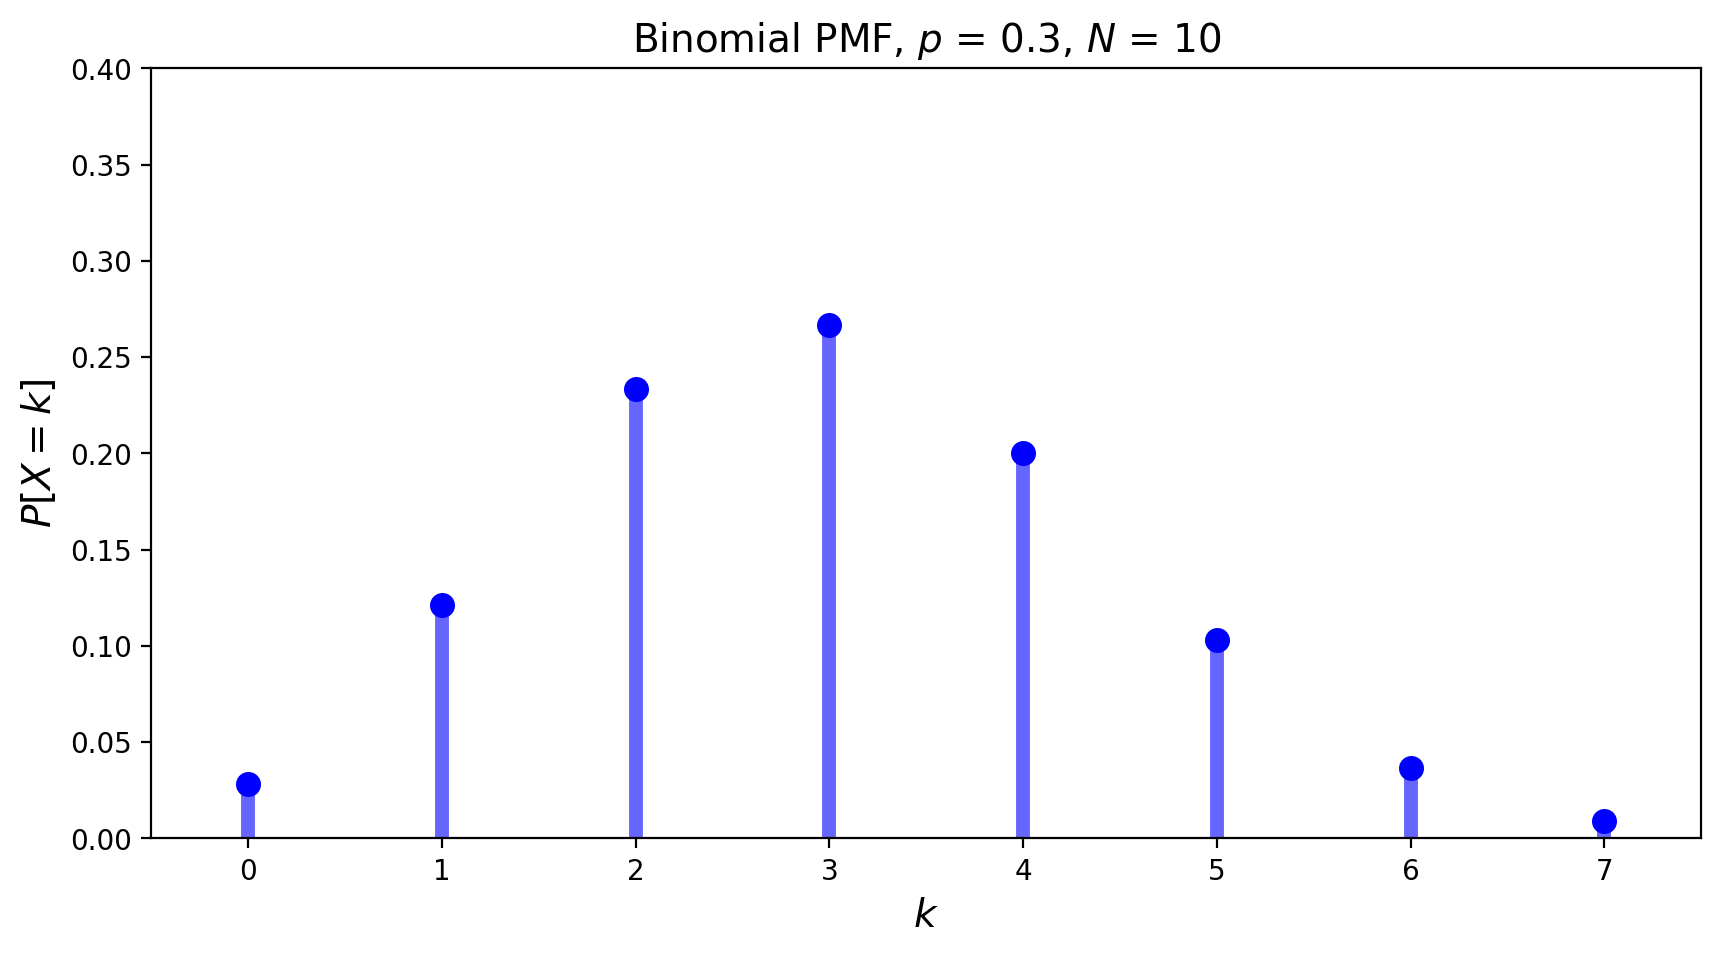

In [5]:
from scipy.stats import binom
p = 0.3
x = np.arange(binom.ppf(0.01, 10, p), binom.ppf(0.9995, 10, p))
plt.figure(figsize=(10, 5))
plt.ylim([0, 0.4])
plt.xlim([-0.5, max(x)+0.5])
plt.plot(x, binom.pmf(x, 10, p), 'bo', ms=8, label = 'binom pmf')
plt.vlines(x, 0, binom.pmf(x, 10, p), colors='b', lw = 5, alpha=0.6)
plt.title(f'Binomial PMF, $p$ = {p}, $N$ = 10', size=14)
plt.xlabel(r'$k$', size=14)
plt.ylabel(r'$P[X = k]$', size=14);

The mean of the Binomial distribution is $pN$, and its variance is $p(1-p)N$.  

### The Geometric Distribution

The geometric distribution concerns Bernoulli trials as well. It has only one parameter $p$, the probability of success.

The geometric distribution answers the question: "What is the probability it takes $k$ trials to obtain the first success?"

__Definition.__ It is said that a random variable $X$ has a _geometric distribution_ with parameter $p$ $(0\leq p \leq 1)$ if $X$ has a discrete distribution with 

$$ p(k) = P(X = k) = p(1-p)^{k-1} \qquad \text{for} \: k \geq 1.$$ 

The mean of the geometric distribution is equal to $\frac{1}{p}$ and its variance is $\frac{1-p}{p^2}$. 

An example of the geometric PMF is given below.

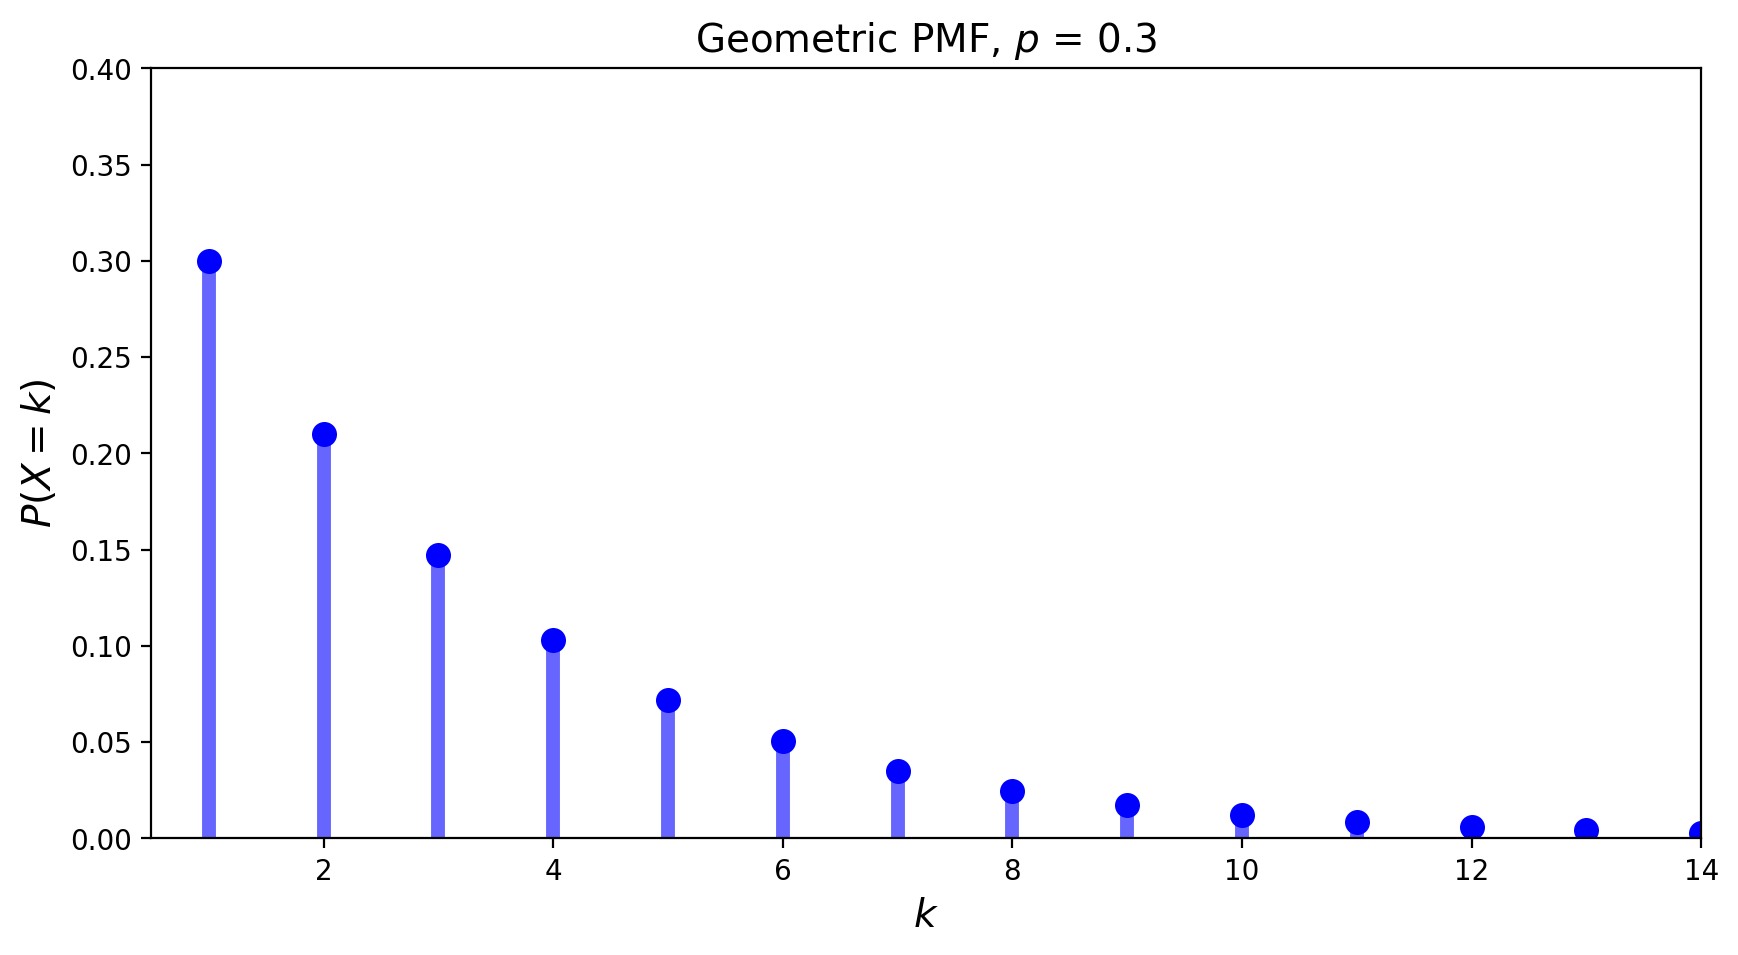

In [6]:
from scipy.stats import geom
p = 0.3
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.995, p))
plt.figure(figsize=(10, 5))
plt.ylim([0, 0.4])
plt.xlim([0.5, max(x)])
plt.plot(x, geom.pmf(x, p), 'bo', ms=8, label = 'geom pmf')
plt.vlines(x, 0, geom.pmf(x, p), colors='b', lw = 5, alpha = 0.6)
plt.title(f'Geometric PMF, $p$ = {p}', size=14)
plt.xlabel(r'$k$', size=14)
plt.ylabel(r'$P(X = k)$', size=14);

### The Poisson Distribution

Although the Bernoulli trials underlie all of the previous distributions, they do not form the basis for the Poisson distribution. To introduce the Poisson distribution we will look at some examples of random variables that generally obey the Poisson probability law are as follows:

1. The number of misprints on a page (or a group of pages) of a book;
2. The number of people in a community who survive to age 100;
3. The number of wrong telephone numbers that are dialed in a day;
4. The number of customers entering a post office on a given day;
5. The number of $\alpha$-particles discharged in a fixed period of time from some radioactive material.

In the above examples the events appear to happen at a certain rate, but completely at random (i.e., without a certain structure). 

A Poisson distribution answers the question: "How many successes occur in a fixed amount of time?"

__Definition.__ A random variable $X$ that takes on one of the values $0, 1, 2,...$ is said to have a _Poisson distribution_ with parameter $\lambda$ if, for some $\lambda > 0$,

$$p(k) = P(X=k) = \lambda^k \frac{e^{- \lambda}}{k!} \: \text{ for } x = 0, 1, 2,...$$

This $p(k)$ defines a PMF, because

$$\sum_{k=0}^{\infty} p(k) = \sum_{k=0}^{\infty} \lambda^k \frac{e^{- \lambda}}{k!} = e^{- \lambda} \sum_{k=0}^{\infty} \frac{\lambda^k}{k!} = e^{- \lambda} e^{\lambda} = 1.$$

Here, we used the fact that the exponential function $e^{\lambda}$, can be expressed as series, $\sum_{k=0}^{\infty} \frac{\lambda^k}{k!}$ for every real number $\lambda$.

Both the mean and the variance of a Poisson distribution with parameter $\lambda$ are equal to $\lambda.$

The PMF of the Poisson distribution with parameter $\lambda = 0.3$  is shown below.

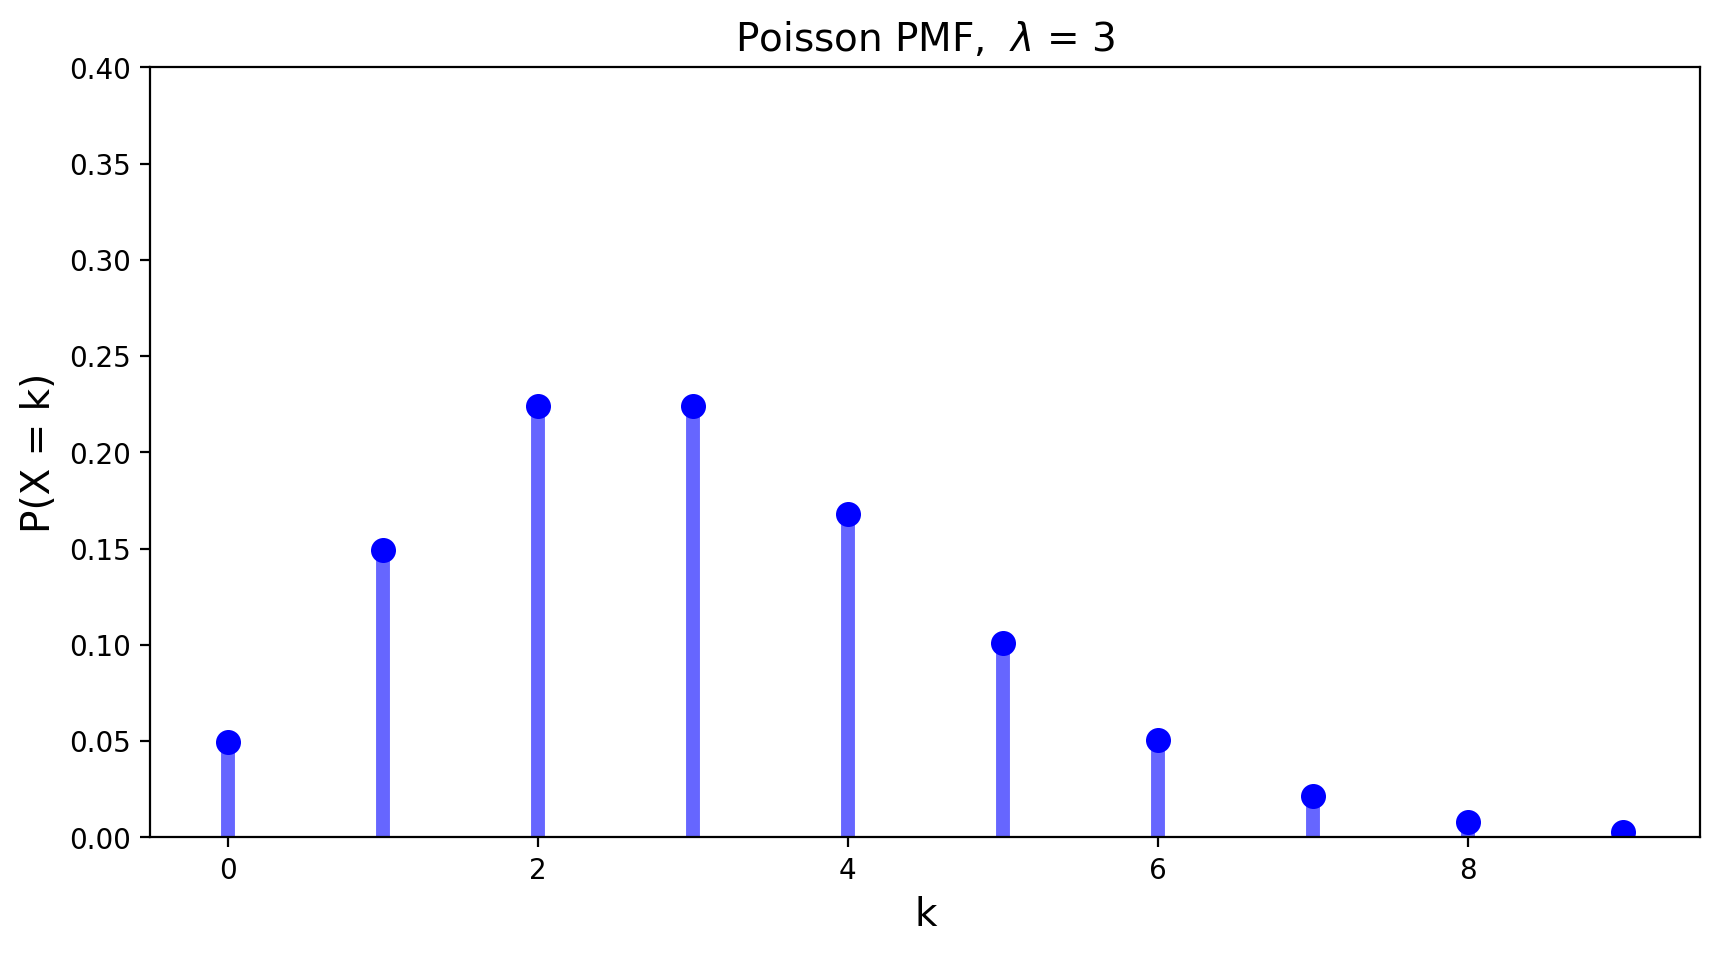

In [7]:
from scipy.stats import poisson
mu = 3
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.9995, mu))
# plt.ylim([0,1])
plt.figure(figsize=(10, 5))
plt.xlim([-0.5, max(x)+0.5])
plt.ylim(ymax = 0.4)
plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.6)
plt.title(f'Poisson PMF,  $\lambda$ = {mu}', size=14)
plt.xlabel(r'k', size=14)
plt.ylabel(r'P(X = k)', size=14);

The Poisson random variable has a tremendous range of applications in diverse areas. The reason for that is the fact that a Poisson distribution with mean $Np$ may be used as an approximation for a binomial distribution with parameters $N$ and $p$ when $N$ is large and $p$ is small enough so that $Np$ is of moderate size. 

A Poisson distribution is closely related to the Poisson process. 

__Definition.__ A _Poisson process_ with rate $\lambda$ per unit time is a process that satisfies the following two properties:

1. The number of successes (misprints, arrivals, etc.) in every fixed interval of time of length $T$ has a Poisson distribution with mean $\lambda T$.
2. The number of successes (misprints, arrivals, etc.) in every two disjoint time intervals are independent.

__Example.__ The classic example of the Poisson random variable comes from history.

>In 1898 Ladislaus Bortkiewicz, a Russian statistician of Polish descent, was trying to understand why, in some years, 
>an unusually large number of soldiers in the Prussian army were dying due to horse-kicks. In a single army corp, 
>there were sometimes 4 such deaths in a single year. Was this just coincidence?

To assess whether horse-kicks were random (not following any pattern) Bortkiewicz simply compared the number per year to what would be predicted by the Poisson distribution.

In [10]:
# note that this data is available in 'data/HorseKicks.txt'
horse_kicks = pd.DataFrame(
data = np.array([
[0, 108.67, 109],
[1, 66.29, 65],
[2, 20.22, 22],
[3, 4.11, 3],
[4, 0.63, 1],
[5, 0.08, 0],
[6, 0.01, 0]]),
columns = ["Number of Deaths Per Year","Predicted Instances (Poisson)","Observed Instances"])
horse_kicks

Number of Deaths Per Year  Predicted Instances (Poisson)  \
0                        0.0                         108.67   
1                        1.0                          66.29   
2                        2.0                          20.22   
3                        3.0                           4.11   
4                        4.0                           0.63   
5                        5.0                           0.08   
6                        6.0                           0.01   

   Observed Instances  
0               109.0  
1                65.0  
2                22.0  
3                 3.0  
4                 1.0  
5                 0.0  
6                 0.0

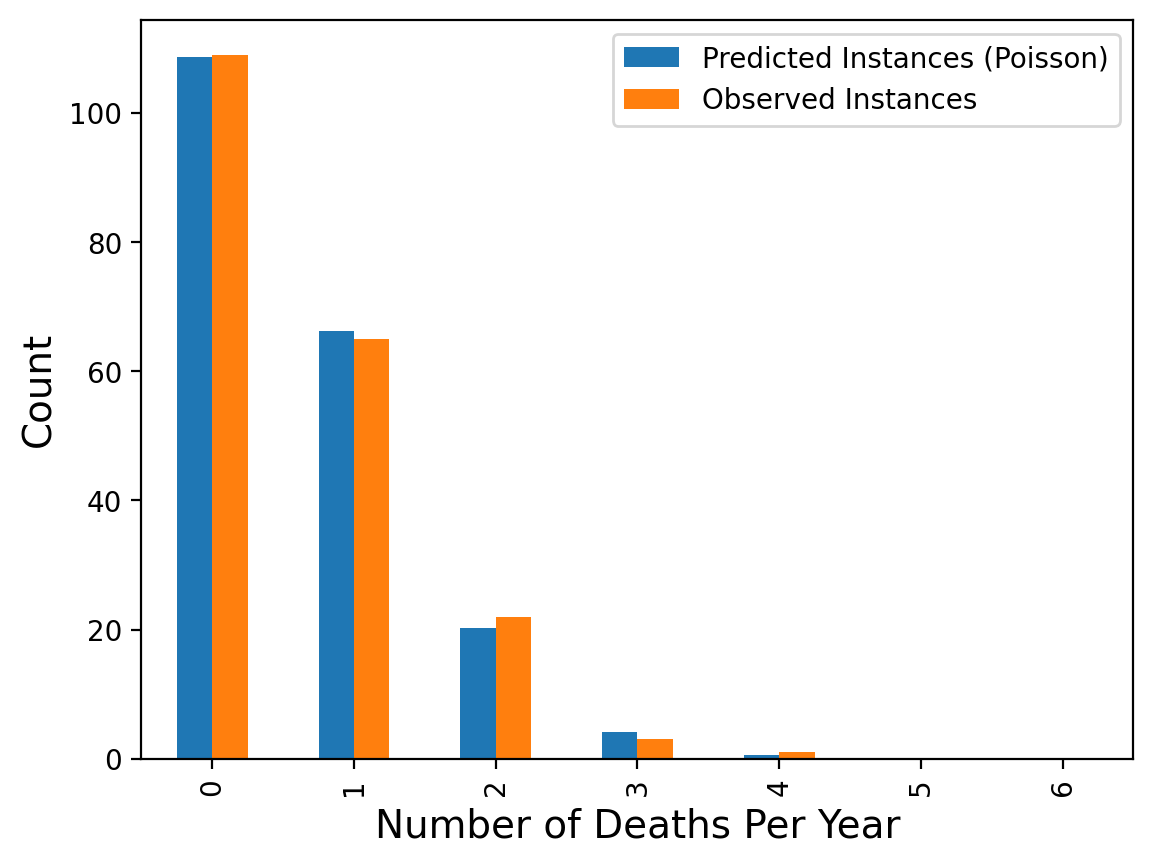

In [11]:
horse_kicks[["Predicted Instances (Poisson)","Observed Instances"]].plot.bar()
plt.xlabel("Number of Deaths Per Year", size=14)
plt.ylabel("Count", size=14);

The message here is that when events occur at random, we actually tend to __perceive them as clustered.__  

### The Discrete Uniform Distribution

The uniform distribution models the case in which all outcomes are equally probable.  This distribution can be a discrete or continuous. We will introduce the continuous version of the uniform distribution in the next lecture.

We have already seen the discrete uniform distribution in the case of rolls of a fair die:

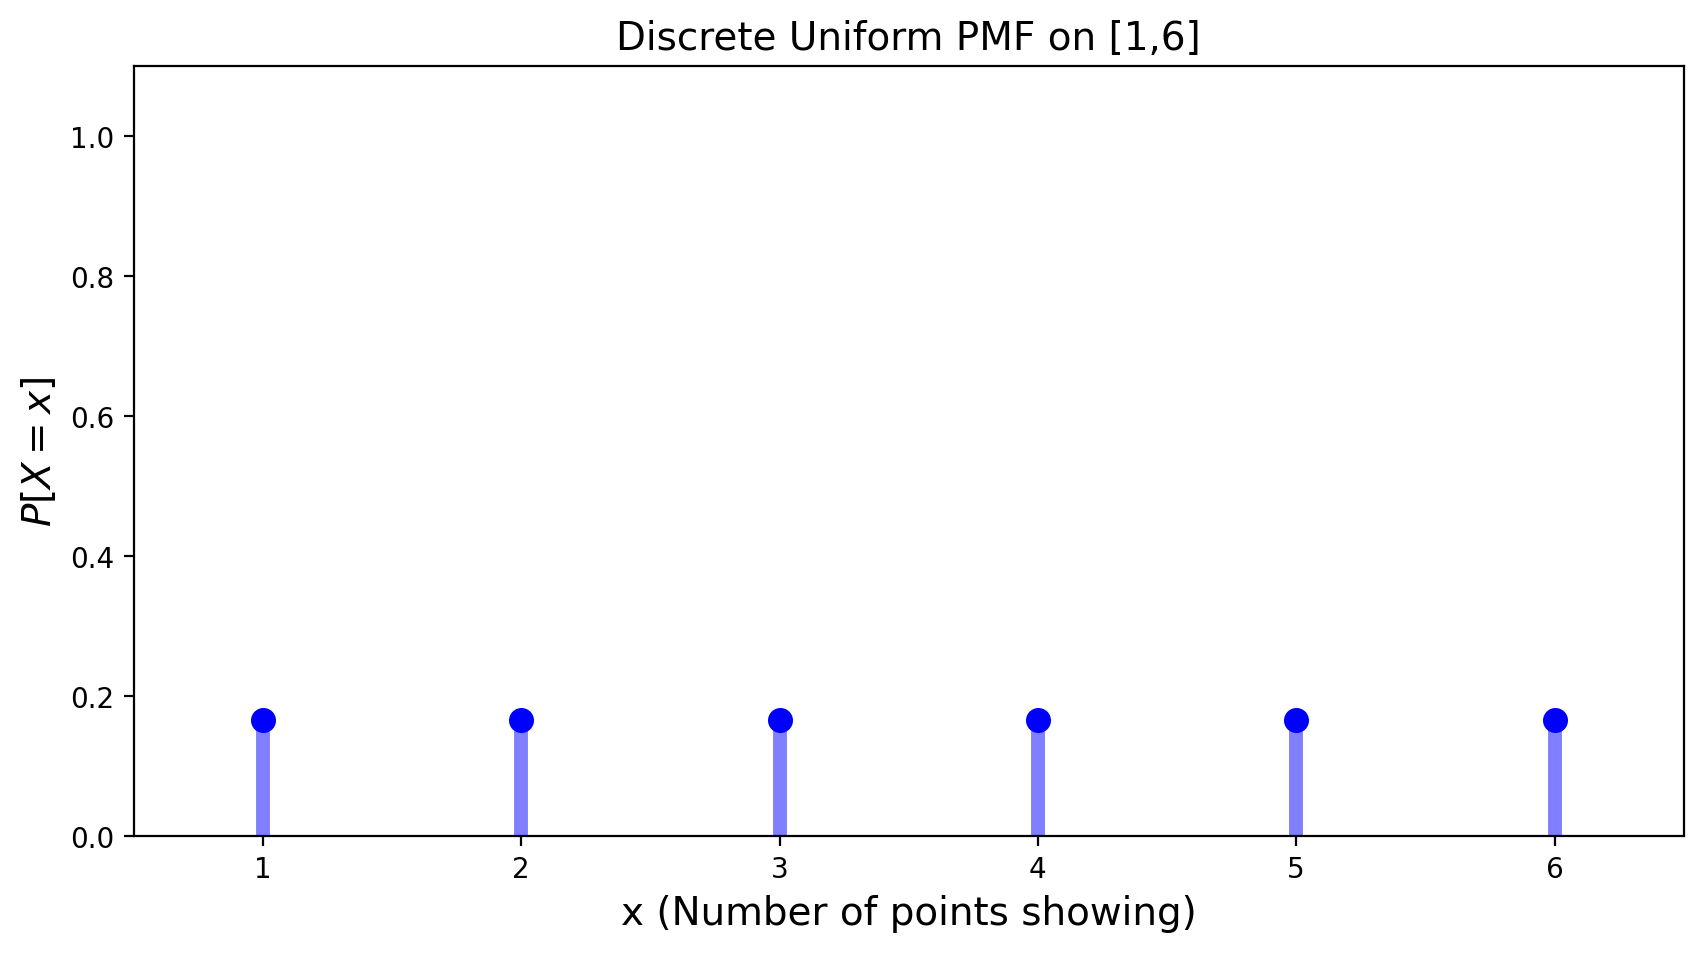

In [9]:
x = np.arange(1, 7)
plt.figure(figsize=(10, 5))
plt.plot(x, 6*[1/6.], 'bo', ms=8)
plt.vlines(x, 0, 1/6., colors='b', lw=5, alpha=0.5)
plt.xlim([0.5, 6.5])
plt.ylim([0, 1.1])
plt.title(f'Discrete Uniform PMF on [1,6]', size=14)
plt.xlabel(r'x (Number of points showing)', size=14)
plt.ylabel(r'$P[X = x]$', size=14);

__Definition.__ A random variable is said to be uniformly distributed on interval $[a,b]$, if it has the PMF equal to 

$$p(x) = \frac{1}{n} \: \text{ with } n = b-a+1 \: \text{ and  } x = 1, 2, 3,..., n.$$ 

The expected value of a discrete uniform distribution is equal to $\frac{a+b}{2}$ and its variance is given by $\frac{n^2 - 1}{12}.$